### Daily Increase Bar Chart for Each State

In [1]:
import pandas as pd
import numpy as np
import datetime
t = datetime.datetime.now()
pd.set_option('display.max_rows', None)
folder = r'C:\Users\Ensheng\Desktop\Coronavirus\CSSE_NYT_Tracking\\'

In [26]:
in_table = folder + r'time_series_covid19_confirmed_US.csv'
df_jhu = pd.read_csv(in_table)
df_jhu = df_jhu.drop(columns=['UID', 'iso2','iso3','code3','FIPS','Admin2','Country_Region','Lat','Long_','Combined_Key'])
print(len(df_jhu))
df_jhu.head(3)

3261


,Province_State,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020
0,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,0,0,0,0,0,0,0,0,0,...,133,133,135,135,136,136,136,136,136,136
2,Northern Mariana Islands,0,0,0,0,0,0,0,0,0,...,11,11,13,13,13,14,14,14,14,14


In [27]:
df_jhu = df_jhu.groupby(['Province_State']).sum()
df_jhu.head(5)

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,3734,3953,4075,4345,4571,4712,4888,5079,5317,5593
Alaska,0,0,0,0,0,0,0,0,0,0,...,277,285,293,300,309,314,319,321,329,335
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,...,3705,3809,3964,4237,4511,4724,4933,5068,5256,5473
Arkansas,0,0,0,0,0,0,0,0,0,0,...,1410,1498,1569,1620,1695,1744,1781,1973,1990,2276


In [28]:
df_jhu = df_jhu.stack().reset_index()
df_jhu = df_jhu.rename(columns={"level_1": "Date", 0: "CSSE"})
print(len(df_jhu))
df_jhu.head(5)

5336


,Province_State,Date,CSSE
0,Alabama,1/22/2020,0
1,Alabama,1/23/2020,0
2,Alabama,1/24/2020,0
3,Alabama,1/25/2020,0
4,Alabama,1/26/2020,0


### add NYT Data

In [15]:
in_table = folder + r'us-states.csv'
df_nyt = pd.read_csv(in_table)
df_nyt = df_nyt.drop(columns=['fips', 'deaths'])
df_nyt = df_nyt.rename(columns={"date": "Date", "state": "Province_State", "cases": "NYT"})
print(len(df_nyt))
df_nyt.head(3)

2833


,Date,Province_State,NYT
0,1/21/2020,Washington,1
1,1/22/2020,Washington,1
2,1/23/2020,Washington,1


In [95]:
df_merged = pd.merge(df_jhu, df_nyt, how='left', on=["Province_State", "Date"])
print(len(df_merged))
df_merged.head(3)

5336


,Province_State,Date,CSSE,NYT
0,Alabama,1/22/2020,0,NaN
1,Alabama,1/23/2020,0,NaN
2,Alabama,1/24/2020,0,NaN


In [29]:
result = df_merged
output_csv = folder + 'confirmed_nyt_jhu_' + t.strftime('%m%d%y') + '.csv'
result.to_csv(output_csv, index=False, encoding='utf-8')

### Plot it

In [96]:
# update date format
# ref: https://stackoverflow.com/questions/33365055/attributeerror-can-only-use-dt-accessor-with-datetimelike-values
# ref: https://stackoverflow.com/questions/38067704/how-to-change-the-datetime-format-in-pandas
df_merged['Date'] = pd.to_datetime(df_merged['Date'], errors='coerce').dt.strftime('%b %d')
# remove unnecessary dates
df_merged = df_merged[df_merged['CSSE']>0]

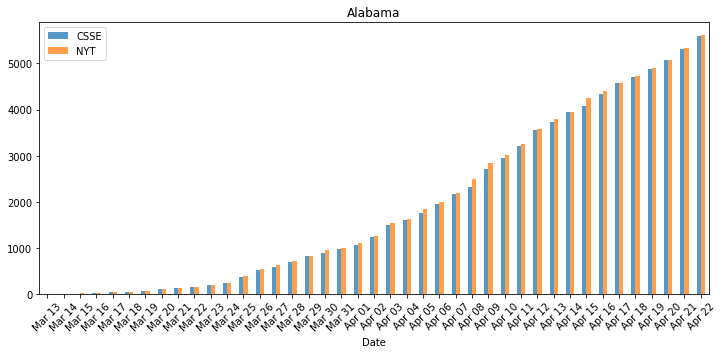

In [97]:
df = df_merged[df_merged["Province_State"] == "Alabama"]
df.plot(x='Date', kind='bar', figsize=(12,5), title="Alabama",alpha=0.75, rot=45)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


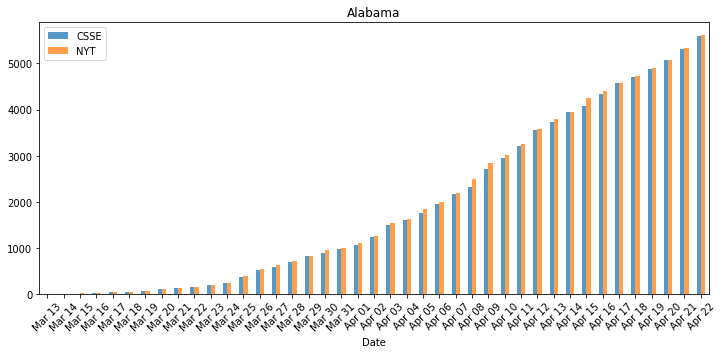

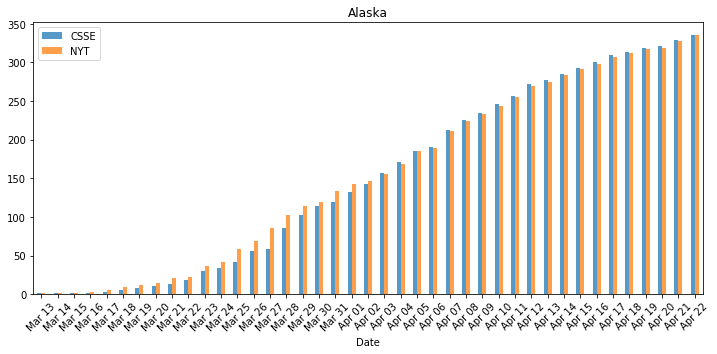

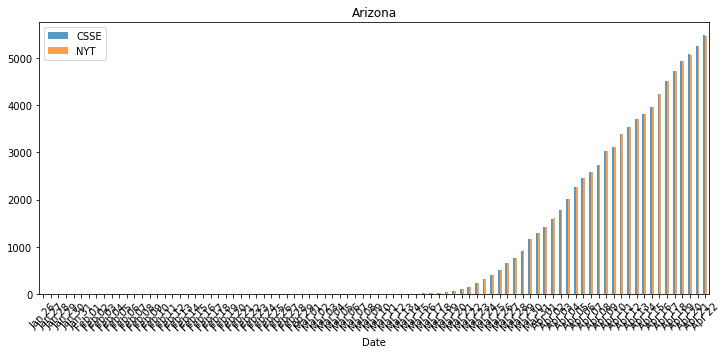

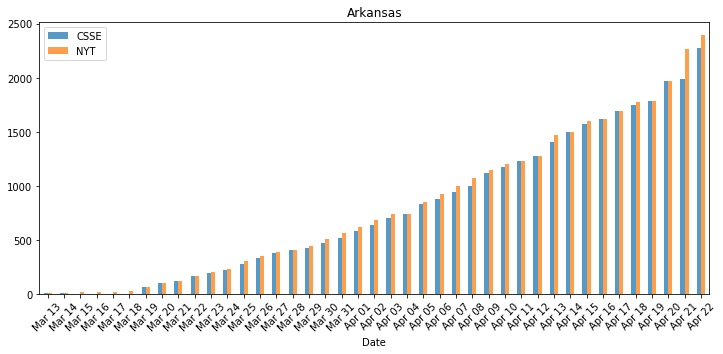

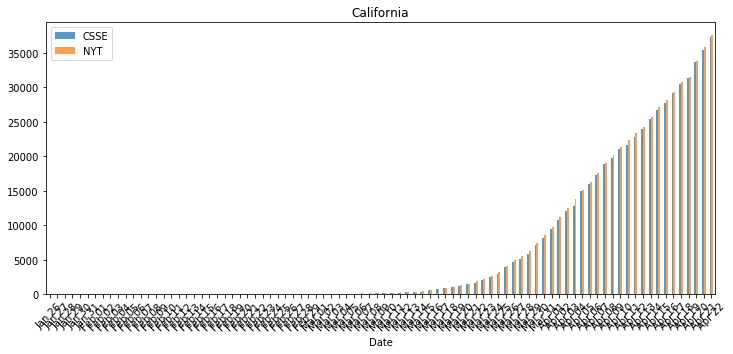

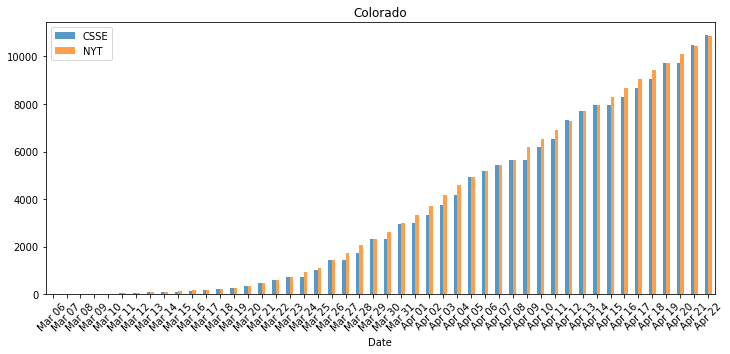

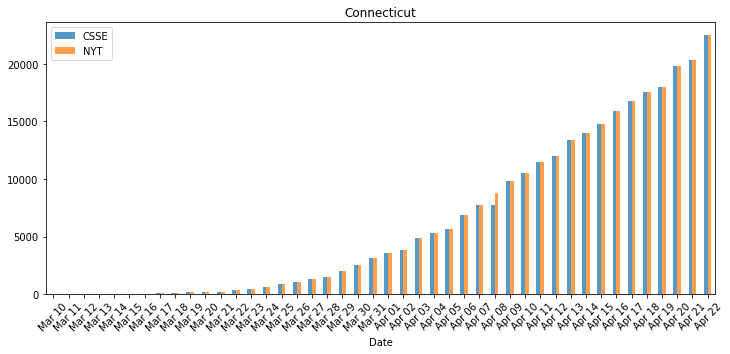

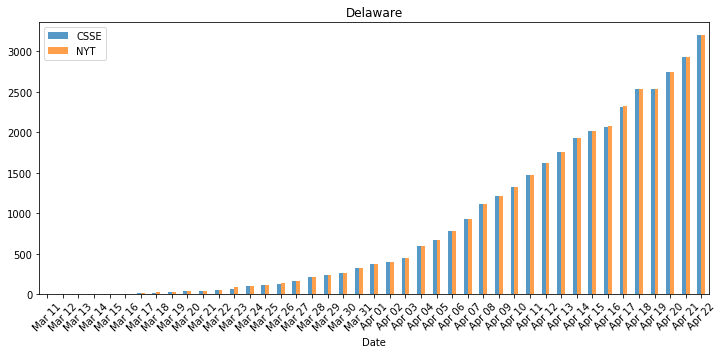

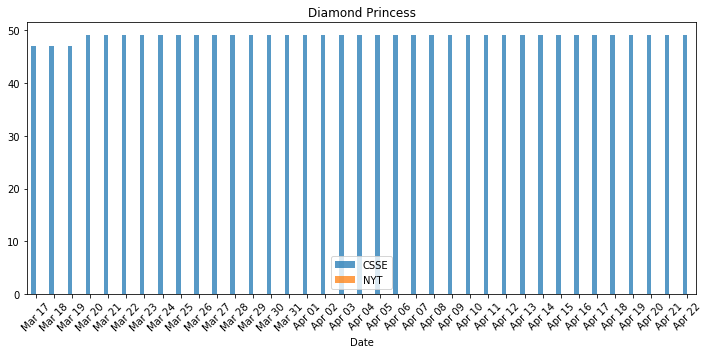

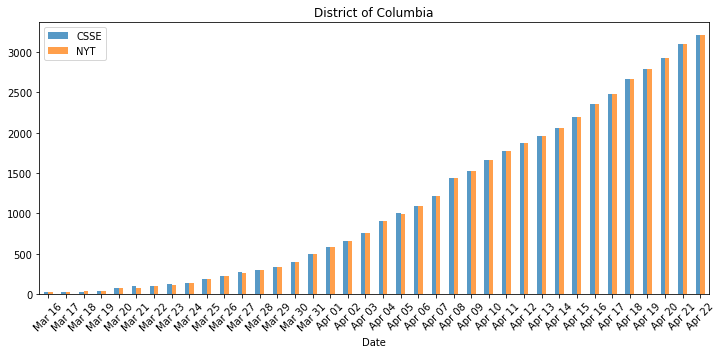

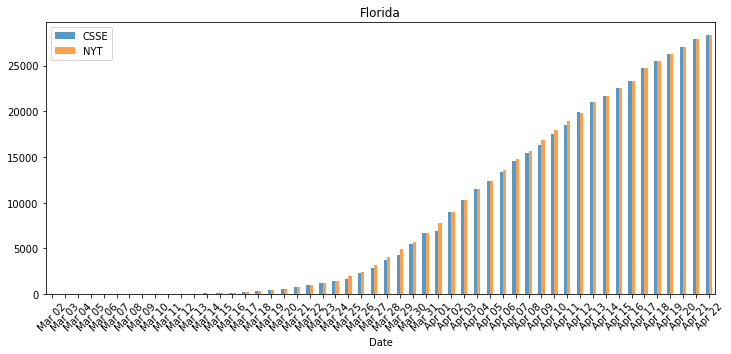

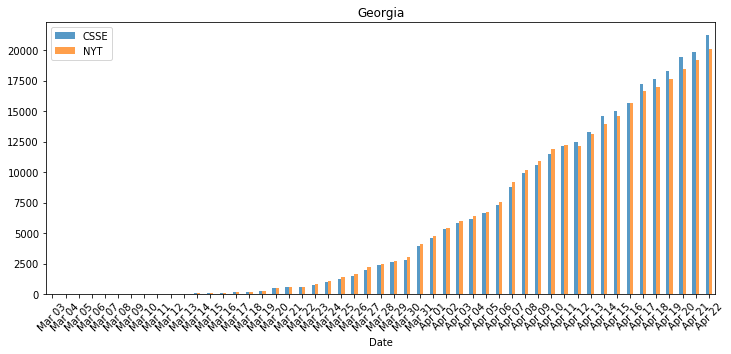

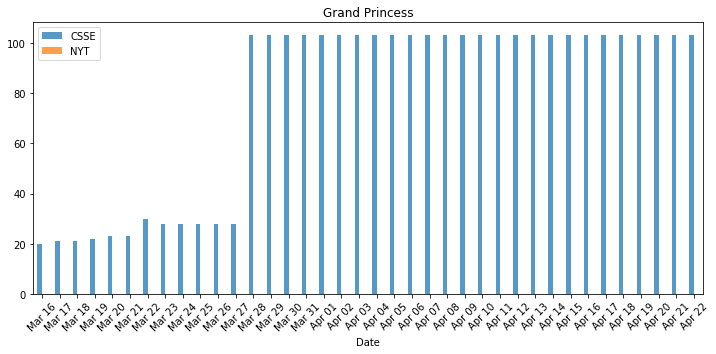

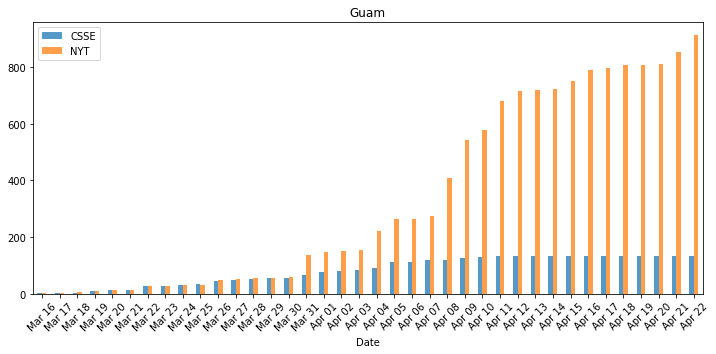

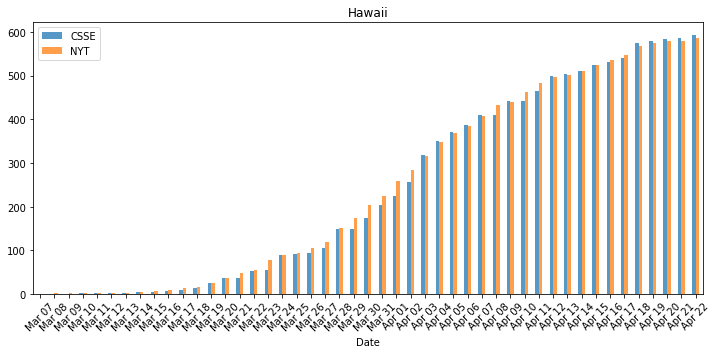

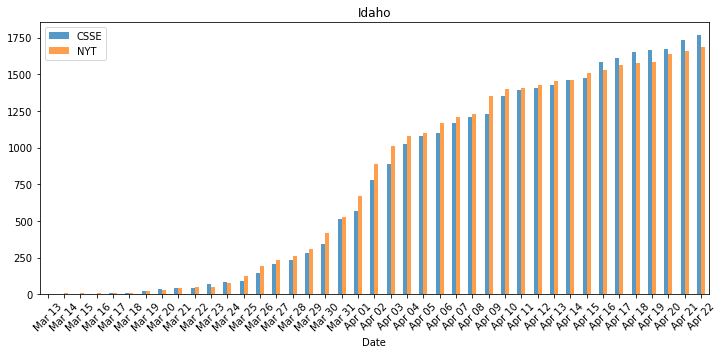

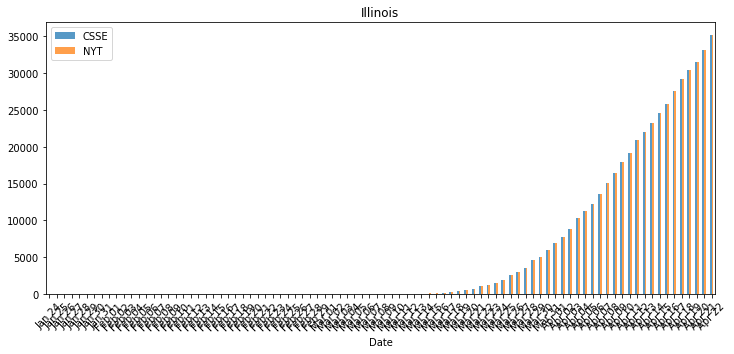

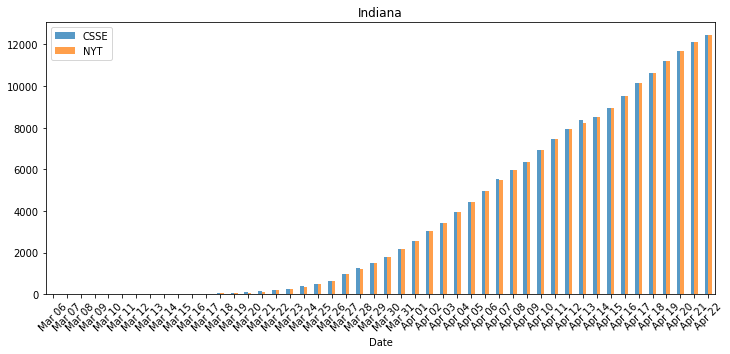

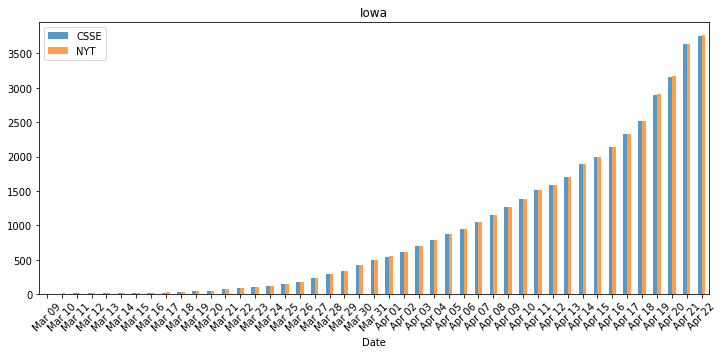

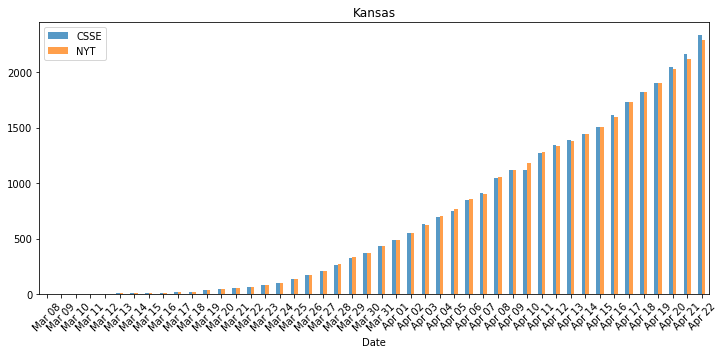

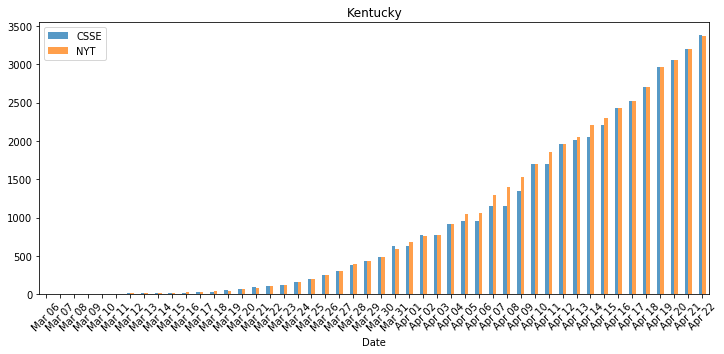

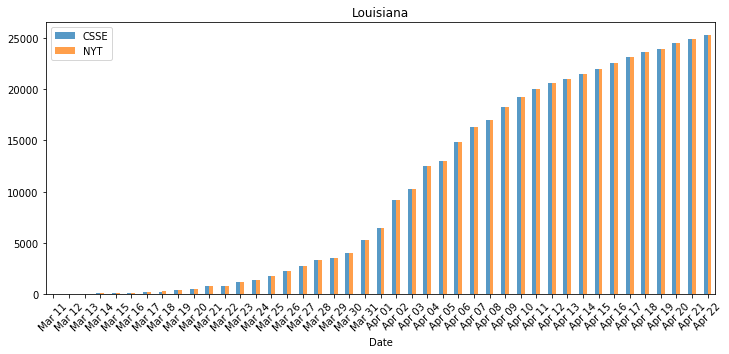

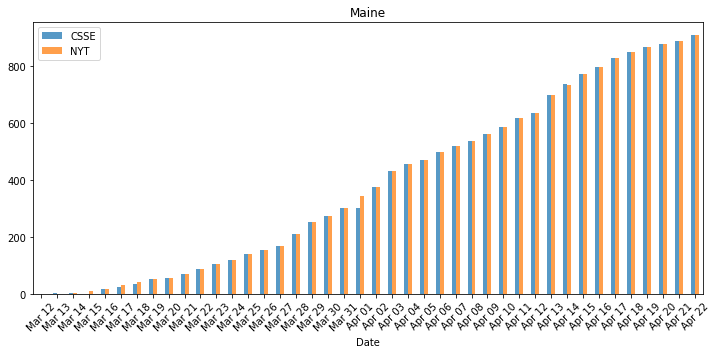

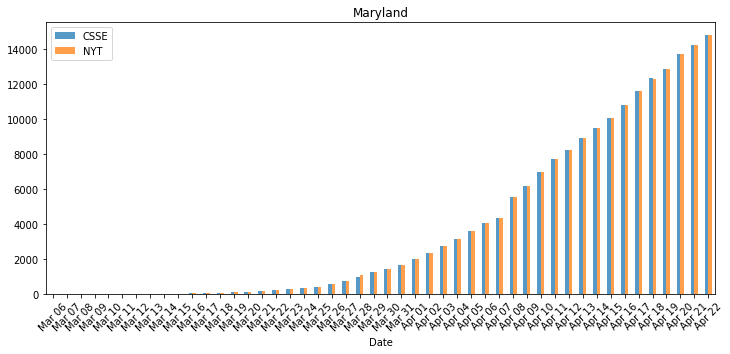

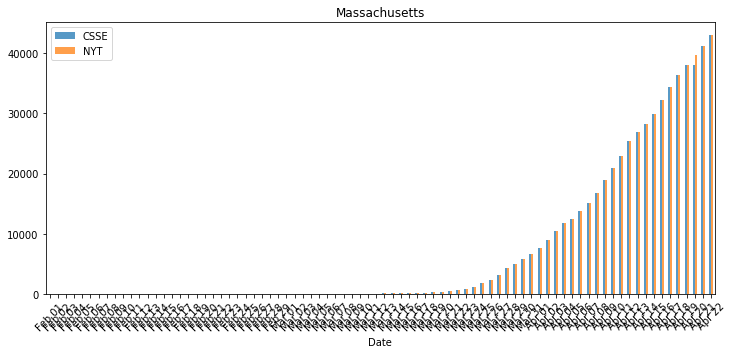

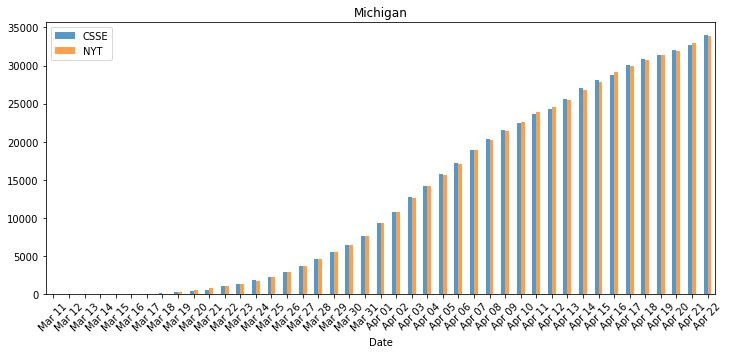

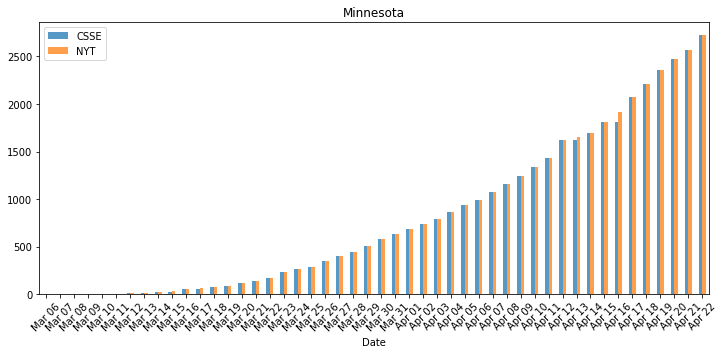

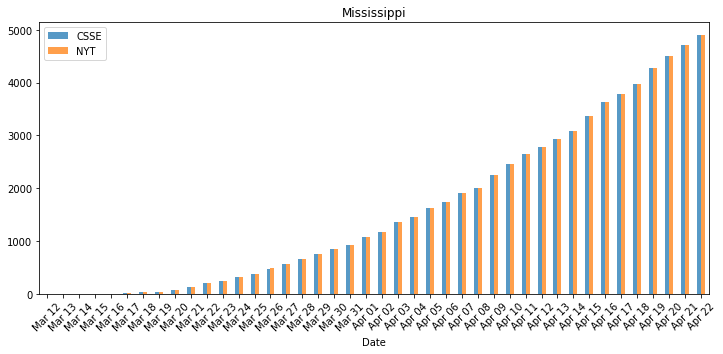

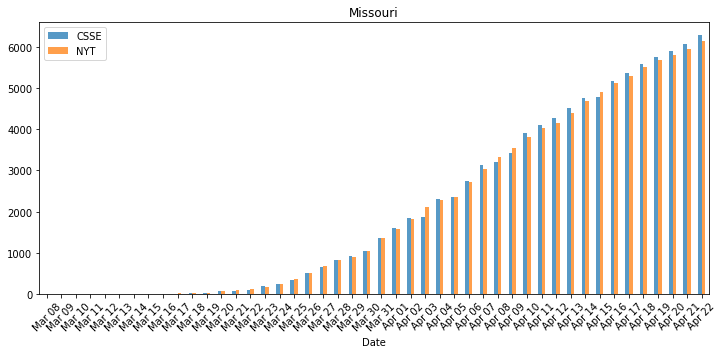

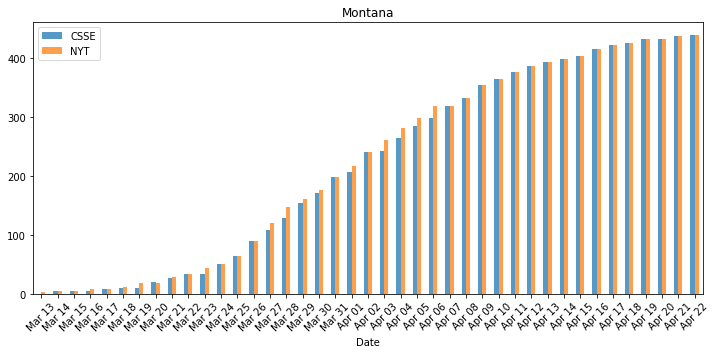

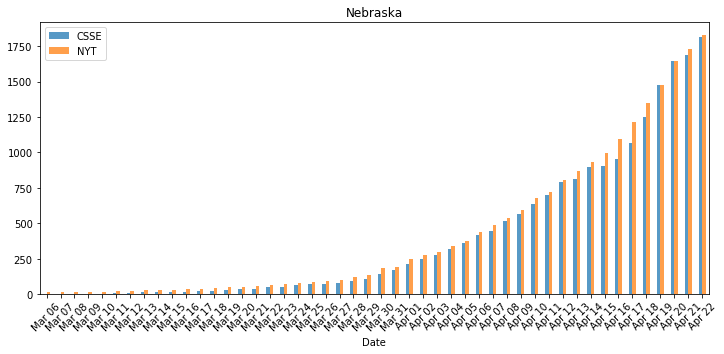

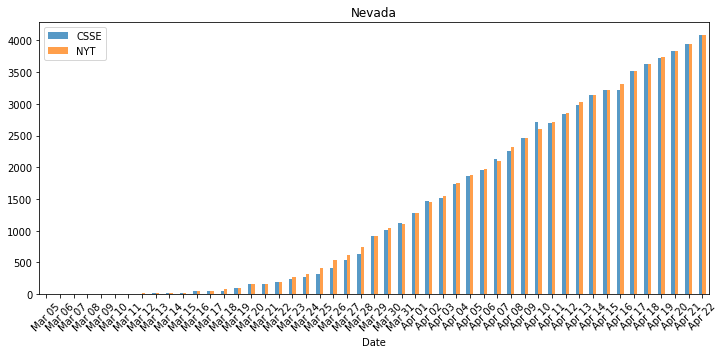

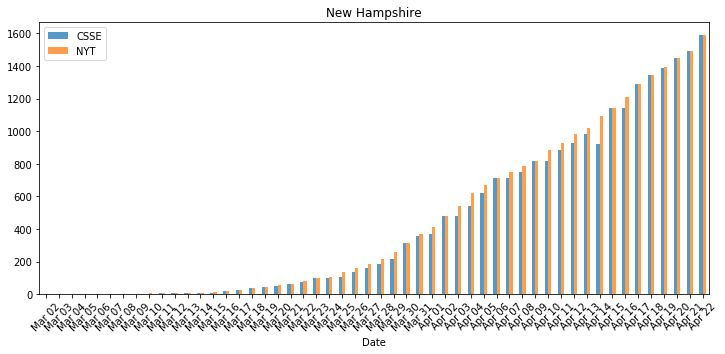

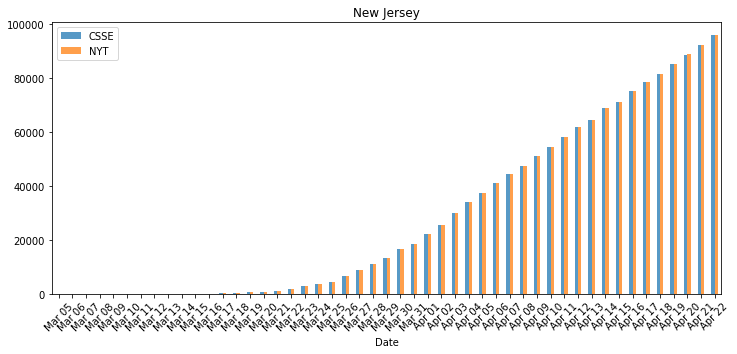

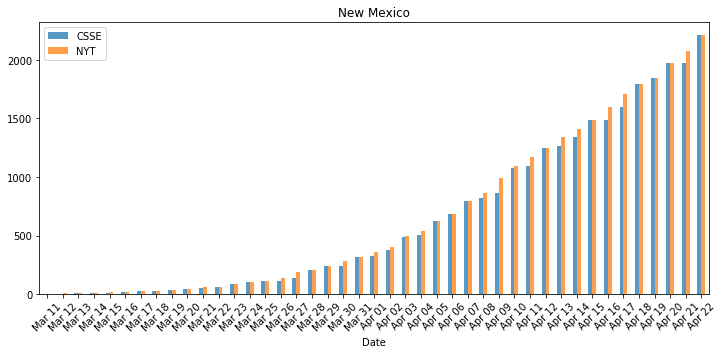

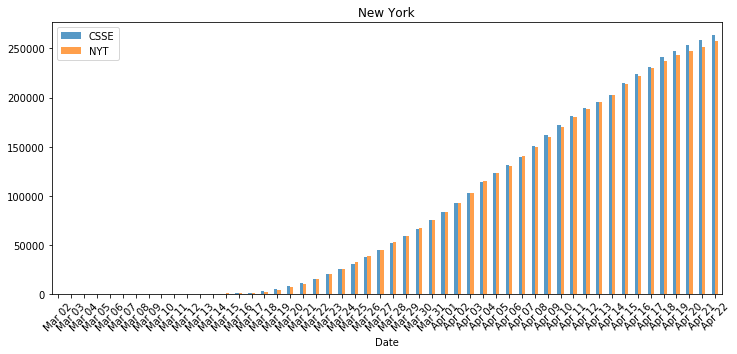

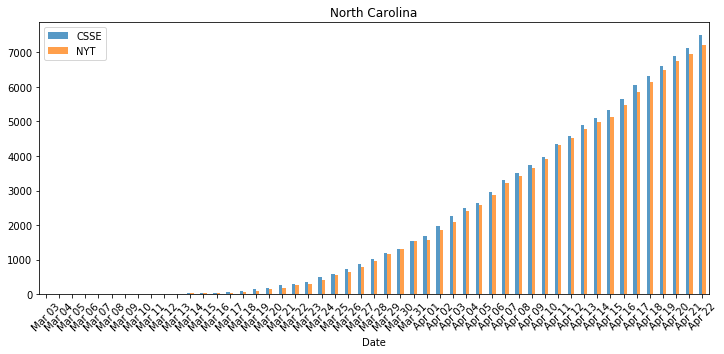

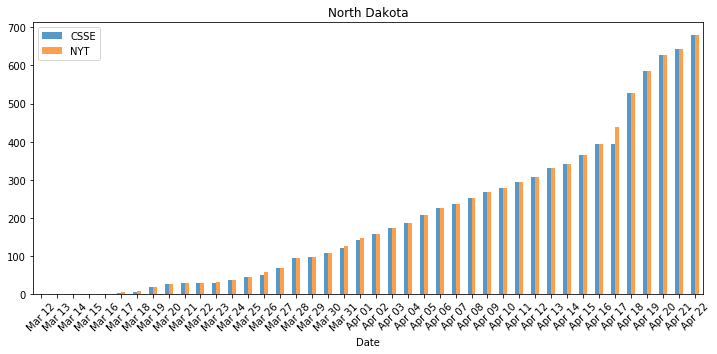

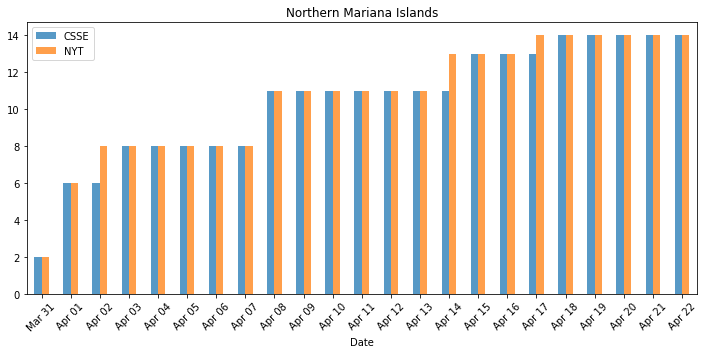

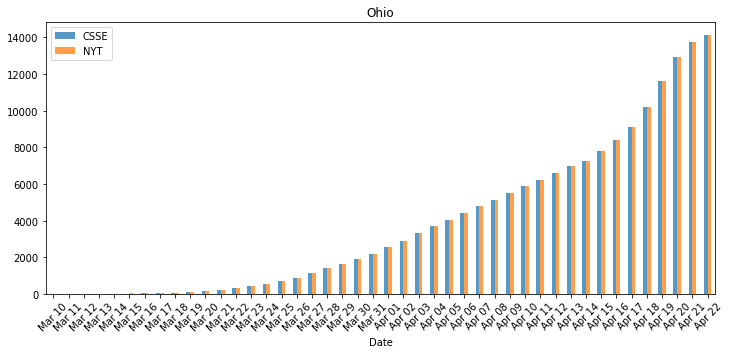

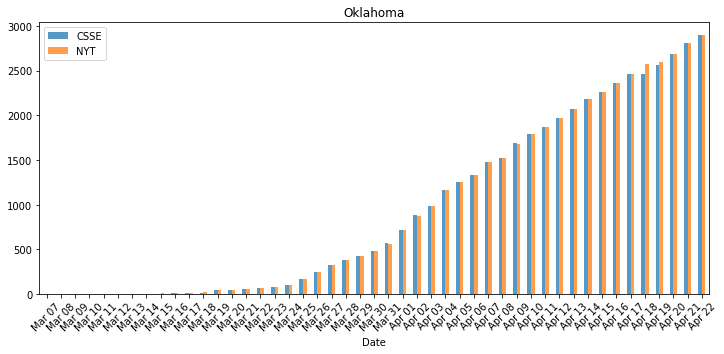

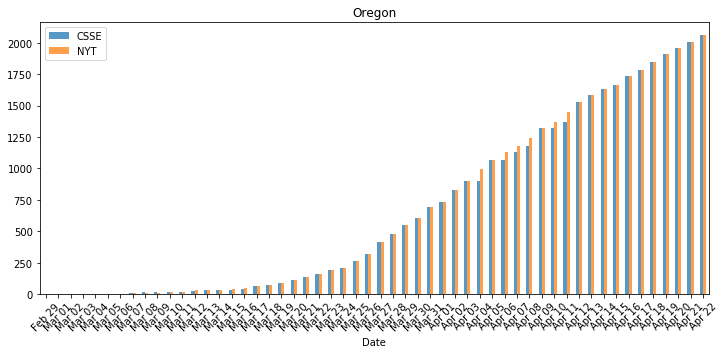

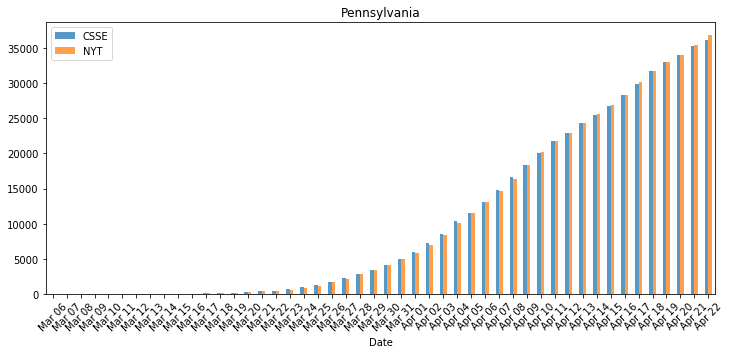

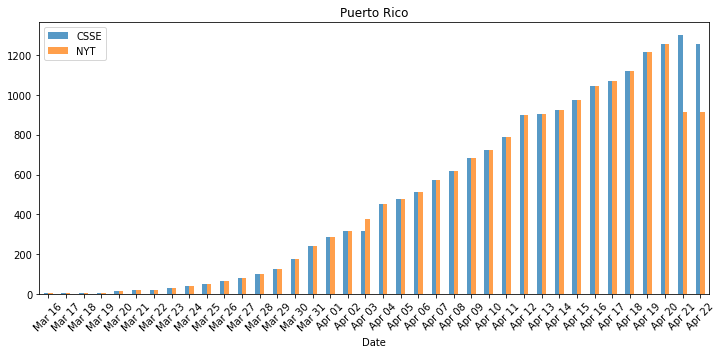

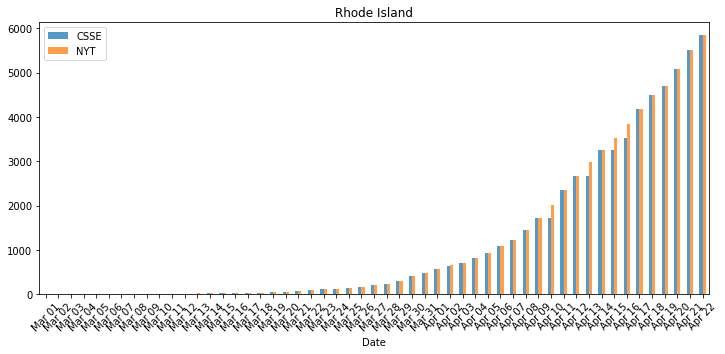

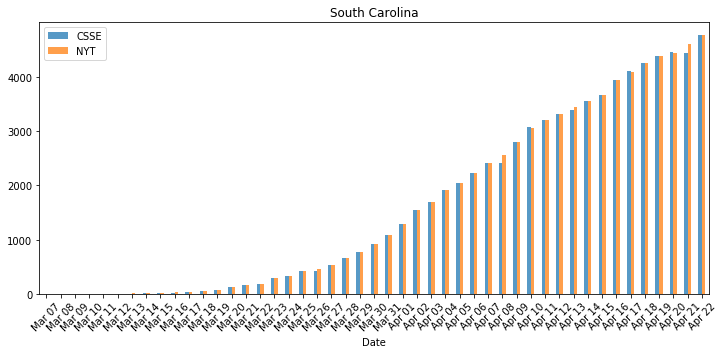

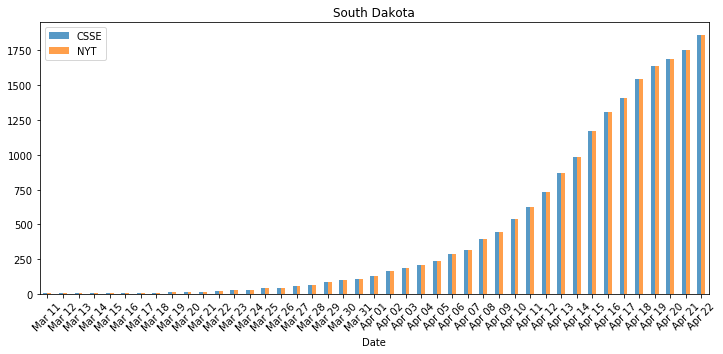

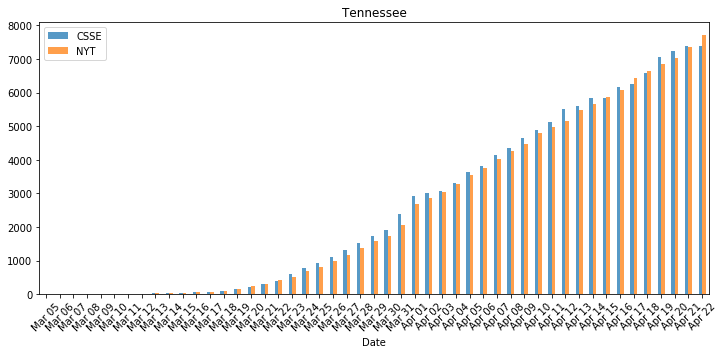

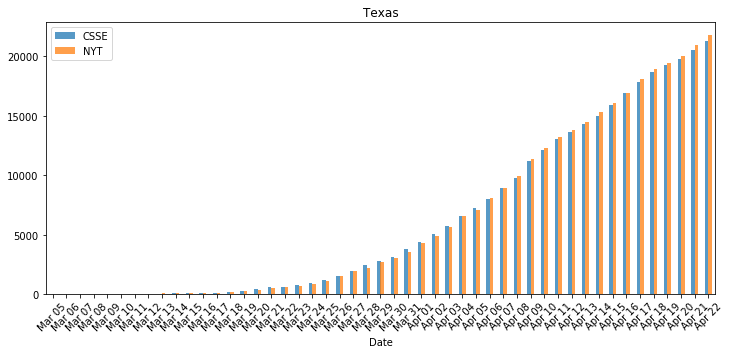

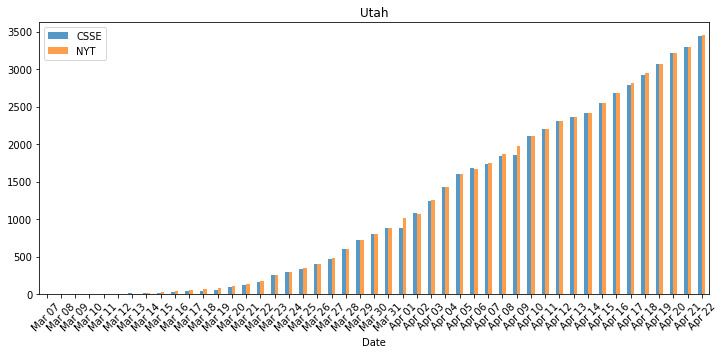

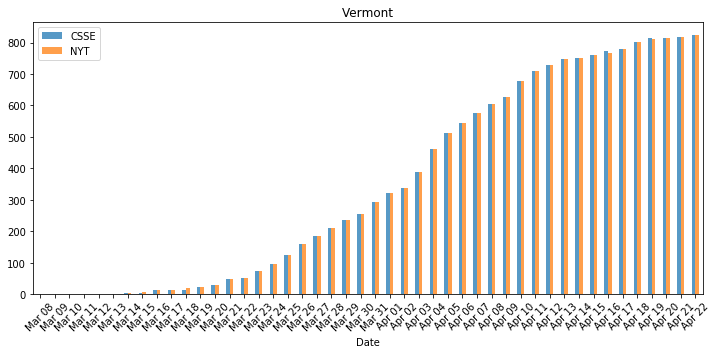

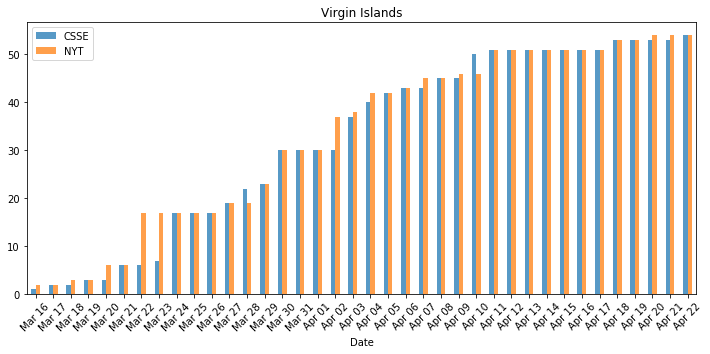

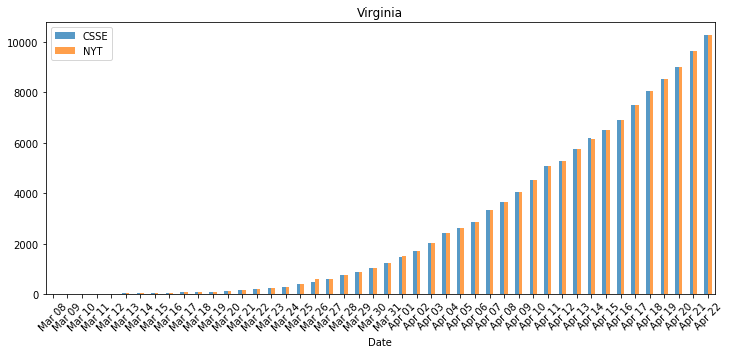

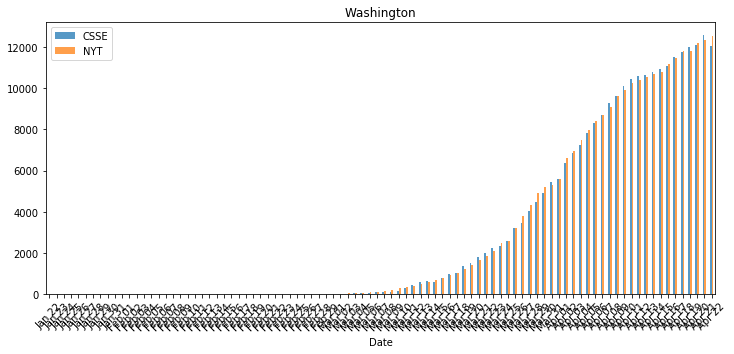

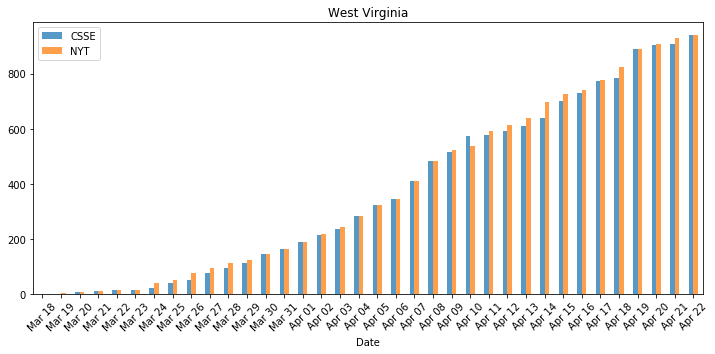

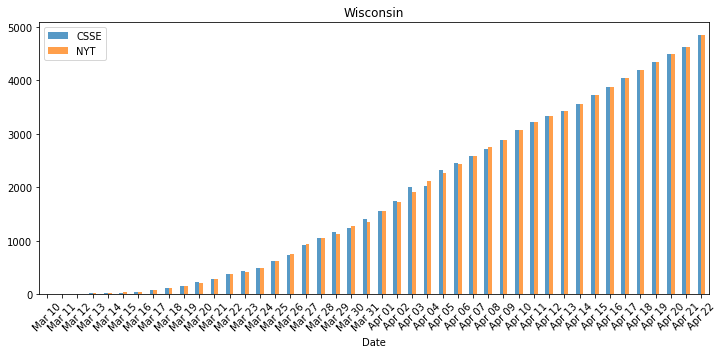

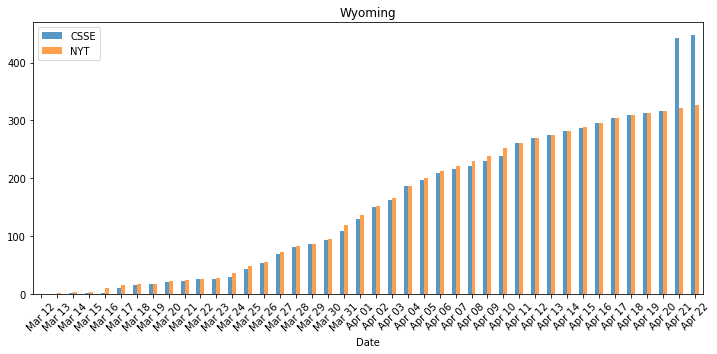

In [114]:
state_set = sorted(set(df_merged["Province_State"]))
for st in state_set:
    df = df_merged[df_merged["Province_State"] == st]
    df.plot(x='Date', kind='bar', figsize=(12,5), title=st,alpha=0.75, rot=45)
    plt.savefig(folder+st+'.png')

### Difference

In [117]:
# calculate the difference and percentage change by state. Make sure the first date for each state is NaN
# ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html
df_jhu['diff'] = df_jhu.groupby(['Province_State'])['CSSE'].diff()
df_jhu['pct_change'] = df_jhu.groupby(['Province_State'])['CSSE'].pct_change()
df_jhu.head(100)

,Province_State,Date,CSSE,diff,pct_change
0,Alabama,1/22/2020,0,NaN,NaN
1,Alabama,1/23/2020,0,0.0,NaN
2,Alabama,1/24/2020,0,0.0,NaN
3,Alabama,1/25/2020,0,0.0,NaN
4,Alabama,1/26/2020,0,0.0,NaN
5,Alabama,1/27/2020,0,0.0,NaN
6,Alabama,1/28/2020,0,0.0,NaN
7,Alabama,1/29/2020,0,0.0,NaN
8,Alabama,1/30/2020,0,0.0,NaN
9,Alabama,1/31/2020,0,0.0,NaN


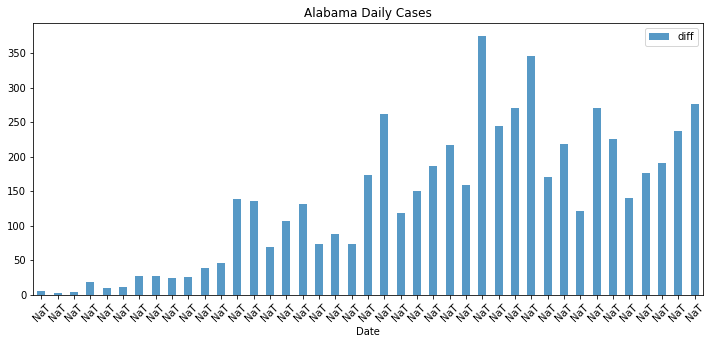

In [121]:
df_jhu['Date'] = pd.to_datetime(df_jhu['Date'], errors='coerce').dt.strftime('%b %d')
df = df_jhu[df_jhu['CSSE']>0]
df = df[df["Province_State"] == "Alabama"]
df.plot(x='Date', y="diff", kind='bar', figsize=(12,5), title="Alabama"+" Daily Cases",alpha=0.75, rot=45)

In [100]:
# detect anomalies
df_weird = df_state[((df_state['pct_change']>1)|(df_state['pct_change']<0)) & (df_state['pct_change'] != np.inf)]
df_weird

,Province_State,Date,Confirmed,diff,pct_change
54,Alabama,3/16/20,29,18.0,1.636364
145,Alaska,3/17/20,3,2.0,2.000000
348,Arizona,4/9/20,3018,-18.0,-0.005929
413,Arkansas,3/15/20,3,-9.0,-0.750000
417,Arkansas,3/19/20,62,58.0,14.500000
585,Colorado,3/7/20,7,4.0,1.333333
589,Colorado,3/11/20,30,16.0,1.142857
593,Colorado,3/15/20,99,-2.0,-0.019802
679,Connecticut,3/11/20,3,2.0,2.000000
681,Connecticut,3/13/20,11,6.0,1.200000


In [102]:
result = df_weird
output_csv = folder + 'weird_caess_' + t.strftime('%m%d%y') + '.csv'
result.to_csv(output_csv, index=False, encoding='utf-8')

In [32]:
import plotly.express as px

In [59]:
fig = px.line(df_state, x='Date', y='diff', color='Province_State')
fig.show()

In [60]:
fig = px.line(df_state, x='Date', y='pct_change', color='Province_State')
fig.show()